# Parameter Estimation of the Multivariate Student's *t*-distribution

We estimate the parameters of the multivariate Student's *t*-distribution using a simple EM algorithm, as outlied in Scheffler (2008). That is, let $\boldsymbol{X}\sim t_p(\boldsymbol{\mu}, \boldsymbol{\Lambda}, \nu)$ with location $\boldsymbol{\mu}\in\mathbb{R}^d$, shape $\boldsymbol{\Lambda}\in\mathbb{R}_{>0}^{d\times d}$, and degrees of freedom $\nu>0$. It admits the density function


$$
f(\boldsymbol{x}) = \frac{\mathrm{\Gamma}\left(\frac{\nu+d}{2}\right)}{\mathrm{\Gamma}\left(\frac{\nu}{2}\right)}\left(\frac{\vert\boldsymbol{\Lambda}\vert}{\pi\nu}\right)^{\frac{1}{2}}\left(1 + \frac{(\boldsymbol{x}-\boldsymbol{\mu})^T\boldsymbol{\Lambda}(\boldsymbol{x}-\boldsymbol{\mu})}{\nu}\right)^{-\frac{\nu+d}{2}}.
$$

<br/>

Scheffler, C. (2008). A derivation of the EM updates for finding the maximum likelihood parameter estimates of the Student's t-distribution. *Technical note. URL www.http://www.inference.org.uk/cs482/publications/scheffler2008derivation.pdf.*


Fitted location: [ 1.0460468  -0.50857413]
Fitted shape:

[[2.04449479 0.31941059]
 [0.31941059 1.38005133]]

Fitted dof:      [2.8109015]


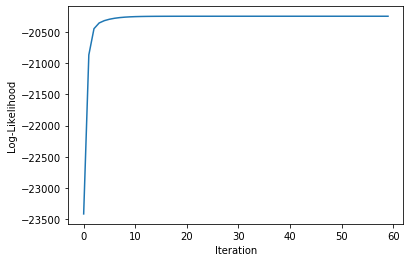

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

from mvem import multivariate_t

# set true location, shape, and degrees of freedom
loc = [1.0, -0.5]
shape = [[2.1, 0.3], [0.3, 1.5]]
df = 3

# sample from the postulated distribution
x = multivariate_t.rvs(loc, shape, df, 5000)

# estimate parameters using EM algorithm
loc_fit, shape_fit, df_fit, loglike = multivariate_t.fit(x)

# print
print("\nFitted location: " + str(loc_fit))
print("Fitted shape:\n"); print(str(shape_fit))
print("\nFitted dof:      " + str(df_fit))

# plot
plt.plot(loglike)
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.show()

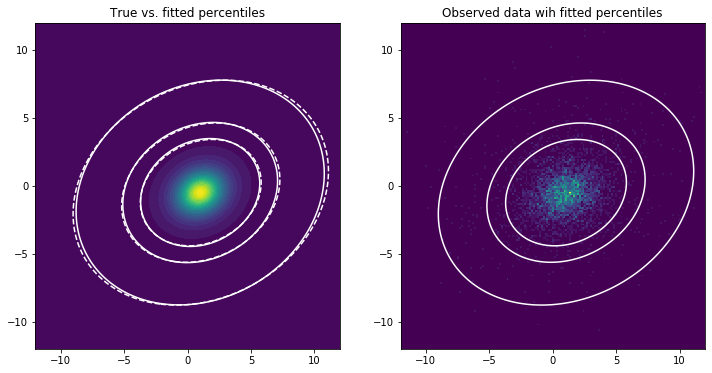

In [6]:
from matplotlib import cm
from scipy import interpolate

# pdf positions
xx   = np.linspace(-12, 12, 300)
yy   = np.linspace(-12, 12, 300)
X, Y = np.meshgrid(xx, yy)
pos  = np.dstack((X, Y))

# density ... and estimate 99, 95 and 90 % percentiles
Z = multivariate_t.pdf(pos, loc_fit, shape_fit, df_fit)
Z = Z / Z.sum()
n = 1000
t = np.linspace(0, Z.max(), n)
integral = ((Z >= t[:, None, None]) * Z).sum(axis=(1,2))
f = interpolate.interp1d(integral, t)
t_contours = f(np.array([0.99, 0.95, 0.90]))

# ... for true pdf
Z_true = multivariate_t.pdf(pos, loc, shape, df)
Z_true = Z_true / Z_true.sum()
n = 1000
t = np.linspace(0, Z_true.max(), n)
integral = ((Z_true >= t[:, None, None]) * Z_true).sum(axis=(1,2))
f = interpolate.interp1d(integral, t)
t_contours_true = f(np.array([0.99, 0.95, 0.90]))

# plot
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].contourf(X,Y,Z_true, 25)
ax[0].contour(X,Y,Z_true, t_contours_true, colors="white")
ax[0].contour(X,Y,Z, t_contours, colors="white", linestyles="--")
ax[0].set_xlim([-12,12])
ax[0].set_ylim([-12,12])
ax[0].set_title("True vs. fitted percentiles")

ax[1].hist2d(x[:,0], x[:,1], bins = 500)
ax[1].set_facecolor("#440154FF")
ax[1].contour(X,Y,Z, t_contours, colors="white")
ax[1].set_xlim([-12,12])
ax[1].set_ylim([-12,12])
ax[1].set_title("Observed data wih fitted percentiles")
plt.show()